# Import Necessary Libraries and Load Files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------- Load dataset ----------
df = pd.read_csv("/content/drive/MyDrive/Colab Data/Group_9_Dataset.csv")

# Analysis of Student Performance

This notebook performs an exploratory data analysis, clustering, and regression analysis on a dataset related to student performance.

## Notebook Structure

1.  **Import Libraries and Load Data**: Necessary libraries are imported and the dataset is loaded into a pandas DataFrame.
2.  **Data Visualization and Cleaning**: Initial data exploration, handling of missing values, and outlier detection are performed.
3.  **Clustering**: K-Means clustering is applied to the numerical features of the dataset. The Elbow Method is used to determine an appropriate number of clusters, and PCA is used to visualize the clusters.
4.  **Regression Analysis**: A linear regression model is built to predict the 'Curricular units 1st sem (grade)' based on other numerical features. The model's performance is evaluated using Mean Squared Error (MSE) and R-squared.

## Dataset

The dataset `Group_9_Dataset.csv` contains various attributes related to students.

## Analysis Steps

-   **Data Loading**: The dataset is loaded using pandas.
-   **Data Cleaning**: Missing values are imputed using the median for numeric features and the mode for categorical features. Outliers are identified using the IQR method and visualized with boxplots.
-   **Correlation Analysis**: The correlation matrix and heatmap for numerical features are generated to understand the relationships between variables.
-   **Clustering**: K-Means clustering is applied after scaling the numerical features. The Elbow method suggests a suitable number of clusters, and PCA is used for visualization.
-   **Regression**: A linear regression model is trained and evaluated to predict student grades in the first semester.

## Results

-   The initial analysis showed no missing values in the dataset.
-   Outliers were detected in several numerical features.
-   A correlation analysis was performed to understand feature relationships.
-   K-Means clustering with 3 clusters was applied and visualized using PCA.
-   The linear regression model achieved an R-squared value of approximately 0.79, indicating a reasonably good fit for predicting first-semester grades.

## Libraries Used

-   pandas
-   numpy
-   matplotlib.pyplot
-   sklearn (SimpleImputer, KMeans, StandardScaler, train_test_split, LinearRegression, mean_squared_error, r2_score, PCA)

Step 2: Data Visualization and Cleaning

In [ ]:
print("Shape:", df.shape)
print(df.info())
print(df.describe())

print("\nMissing values before:")
print(df.isnull().sum())


Shape: (4424, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation    

## Impute numeric with median, categorical with mode

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

df_clean = df.copy()
df_clean[num_cols] = SimpleImputer(strategy="median").fit_transform(df[num_cols])
for c in cat_cols:
    df_clean[c] = df[c].fillna(df[c].mode()[0])

print("\nMissing values after:")
print(df_clean.isnull().sum())


Missing values after:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                            

## Outlier detection


Outliers per numeric feature:
{'Marital status': np.int64(505), 'Application mode': np.int64(0), 'Application order': np.int64(541), 'Course': np.int64(0), 'Daytime/evening attendance': np.int64(483), 'Previous qualification': np.int64(707), 'Nacionality': np.int64(110), "Mother's qualification": np.int64(0), "Father's qualification": np.int64(0), "Mother's occupation": np.int64(84), "Father's occupation": np.int64(84), 'Displaced': np.int64(0), 'Educational special needs': np.int64(51), 'Debtor': np.int64(503), 'Tuition fees up to date': np.int64(528), 'Gender': np.int64(0), 'Scholarship holder': np.int64(1099), 'Age at enrollment': np.int64(441), 'International': np.int64(110), 'Curricular units 1st sem (credited)': np.int64(577), 'Curricular units 1st sem (enrolled)': np.int64(424), 'Curricular units 1st sem (evaluations)': np.int64(158), 'Curricular units 1st sem (approved)': np.int64(180), 'Curricular units 1st sem (grade)': np.int64(726), 'Curricular units 1st sem (without evalu

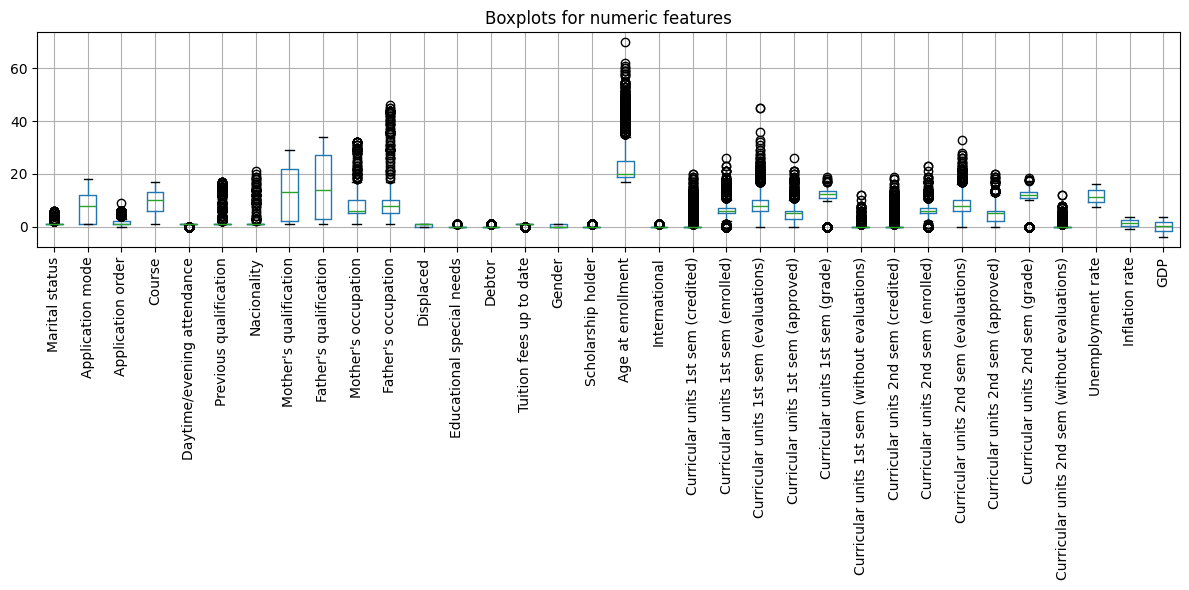

In [ ]:
outliers = {}
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers[col] = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()

print("\nOutliers per numeric feature:")
print(outliers)

plt.figure(figsize=(12,6))
df_clean[num_cols].boxplot(rot=90)
plt.title("Boxplots for numeric features")
plt.tight_layout()
plt.show()

## Correlation


Correlation matrix:
                                                Marital status  \
Marital status                                        1.000000   
Application mode                                      0.224855   
Application order                                    -0.125854   
Course                                                0.018925   
Daytime/evening attendance                           -0.274939   
Previous qualification                                0.120925   
Nacionality                                          -0.020722   
Mother's qualification                                0.185522   
Father's qualification                                0.128326   
Mother's occupation                                   0.069734   
Father's occupation                                   0.024351   
Displaced                                            -0.234886   
Educational special needs                            -0.028343   
Debtor                                                0

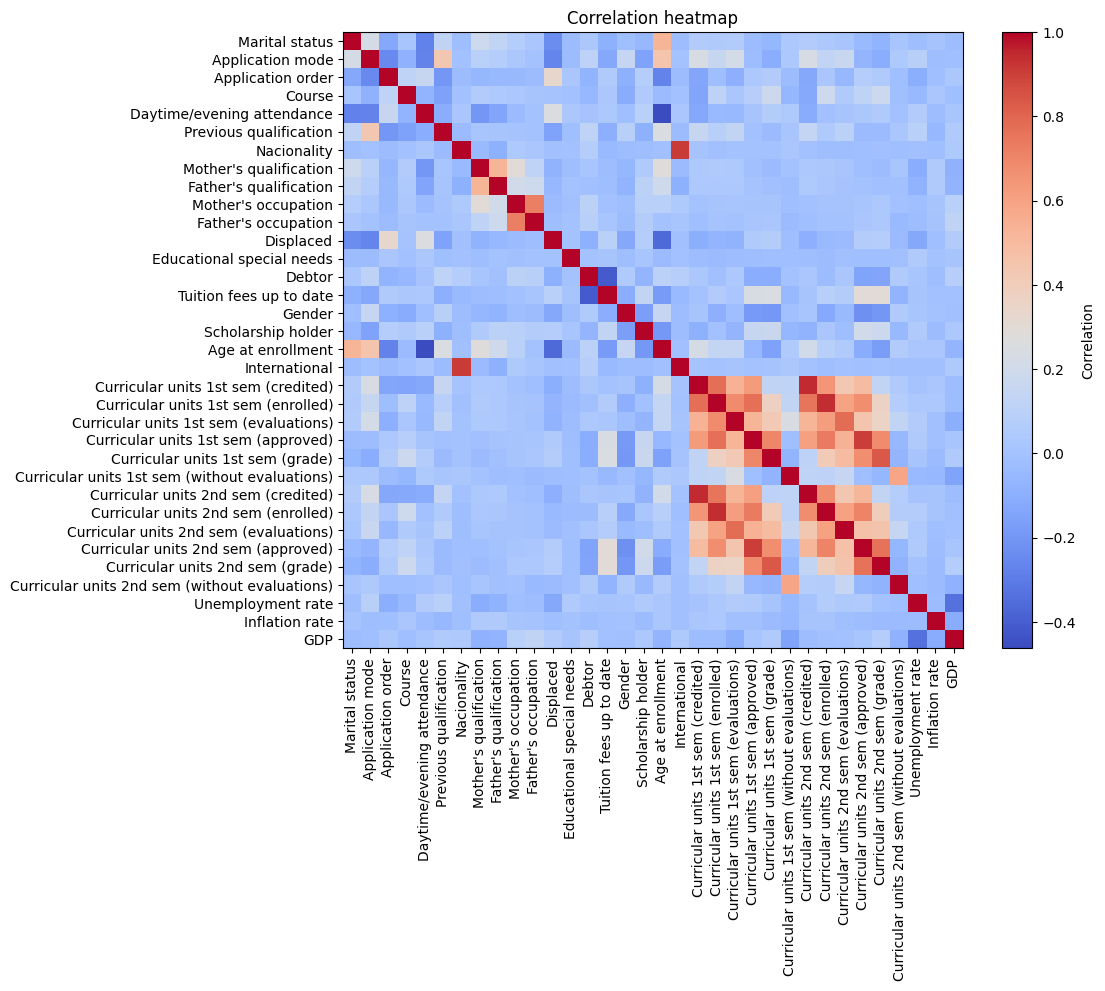

In [ ]:
corr = df_clean[num_cols].corr()
print("\nCorrelation matrix:")
print(corr)

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation heatmap")
plt.show()

# Step 3: Clustering

In [ ]:
X = df_clean[num_cols]
X_scaled = StandardScaler().fit_transform(X)

## Elbow Method

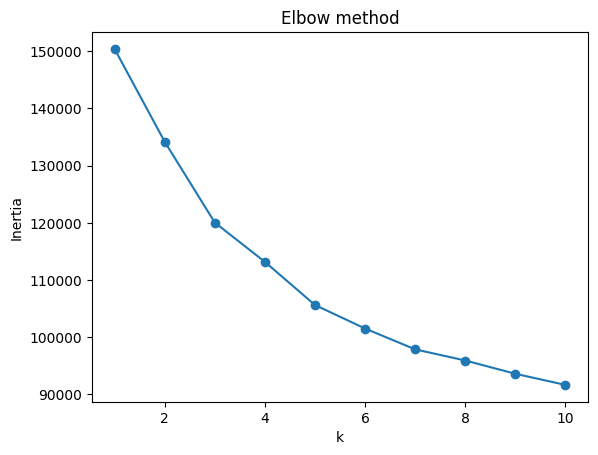

In [ ]:
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

## Scale features

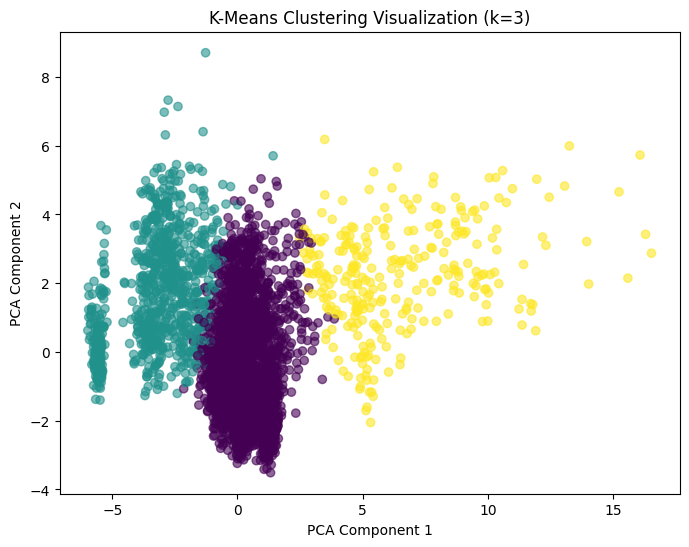

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["cluster"] = kmeans.fit_predict(X_scaled)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_clean["cluster"], cmap="viridis", alpha=0.6)
plt.title("K-Means Clustering Visualization (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Step 4: Regression Analysis


Regression results:
MSE: 4.846477235292661
R2: 0.7916484936897281


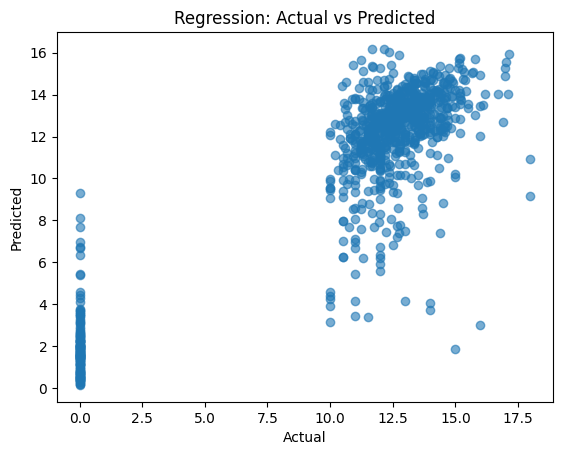

In [ ]:
y = df_clean["Curricular units 1st sem (grade)"]
X = df_clean[num_cols].drop("Curricular units 1st sem (grade)", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nRegression results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Regression: Actual vs Predicted")
plt.show()